In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [6]:
popularity_data = pd.read_csv('closing_popularity.csv')
price_data = pd.read_csv('closing_price.csv')

In [7]:
popularity_data.head()

,Unnamed: 0,date,AMZN,APHA,BABA,CPRX,DIS,DKNG,ET,FB,...,PENN,PLUG,PTON,PYPL,SNE,TXMD,UBER,V,WMT,ZNGA
0,0,2018-05-02,72491.0,NaN,75802.0,1287.0,59936.0,NaN,1701.0,105088.0,...,364.0,19652.0,NaN,26090.0,10562.0,1528.0,NaN,19347.0,28241.0,32425.0
1,1,2018-05-03,72787.0,NaN,76308.0,1284.0,59950.0,NaN,1711.0,104394.0,...,366.0,19636.0,NaN,26214.0,10520.0,1531.0,NaN,19423.0,28327.0,32252.0
2,2,2018-05-04,72788.0,NaN,77977.0,1286.0,60491.0,NaN,1710.0,104351.0,...,359.0,19690.0,NaN,26272.0,10497.0,1547.0,NaN,19400.0,28374.0,32104.0
3,3,2018-05-05,72090.0,NaN,74309.0,1286.0,60117.0,NaN,1706.0,103891.0,...,356.0,19793.0,NaN,26156.0,10488.0,1525.0,NaN,19382.0,28245.0,31734.0
4,4,2018-05-06,72089.0,NaN,74310.0,1286.0,60119.0,NaN,1706.0,103894.0,...,356.0,19793.0,NaN,26156.0,10489.0,1525.0,NaN,19383.0,28247.0,31738.0


In [8]:
price_data.head()

,date,AMZN,APHA,BABA,CPRX,DIS,DKNG,ET,FB,GE,...,PENN,PLUG,PTON,PYPL,SNE,TXMD,UBER,V,WMT,ZNGA
0,2018-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Companies we care about
companies = ['CPRX', 'BABA', 'SNE', 'APHA', 'GOOGL', 'MSFT', 'AMZN', 'NRZ', 'PTON', 'PYPL', 'NKE', 'V', 
             'UBER', 'GM', 'FB', 'KO', 'MRNA', 'NVDA', 'PLUG', 'TXMD', 'ZNGA', 'WMT', 'JNJ', 'NTDOY', 
             'DKNG', 'ET', 'PENN', 'GE', 'JPM', 'DIS']

# All dates we have data for in string format
dates = pd.date_range(start="2020-01-15",end="2020-08-13")
dates = [date.strftime('%Y-%m-%d') for date in list(dates)]

/home/sumin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


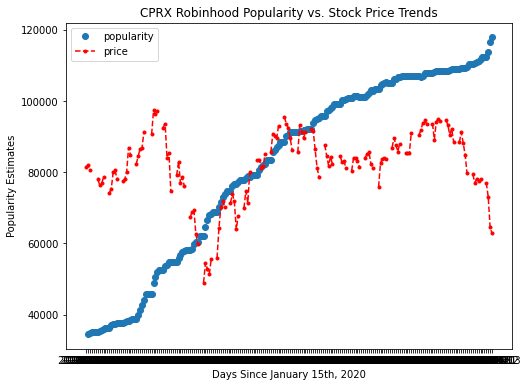

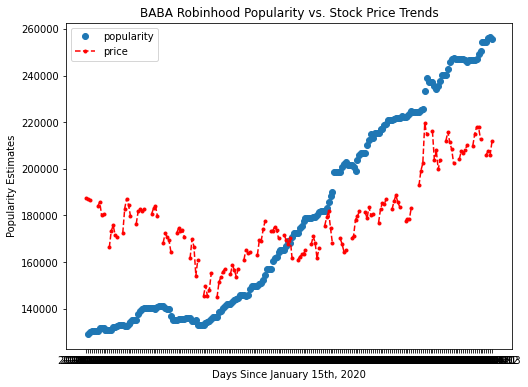

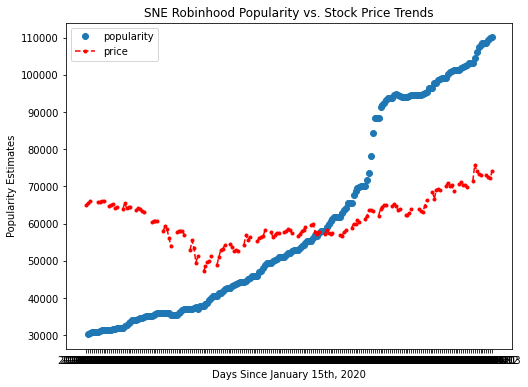

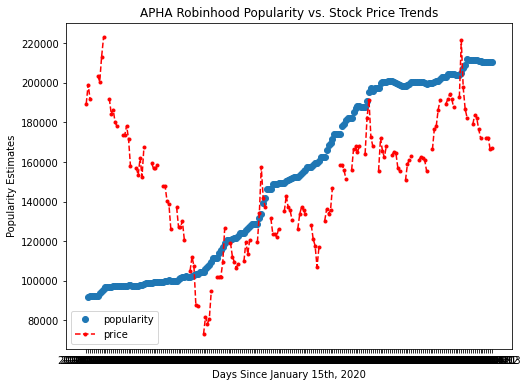

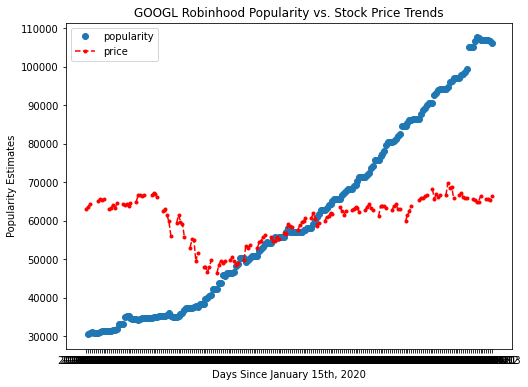

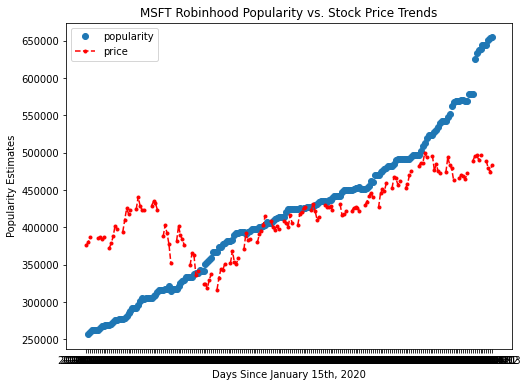

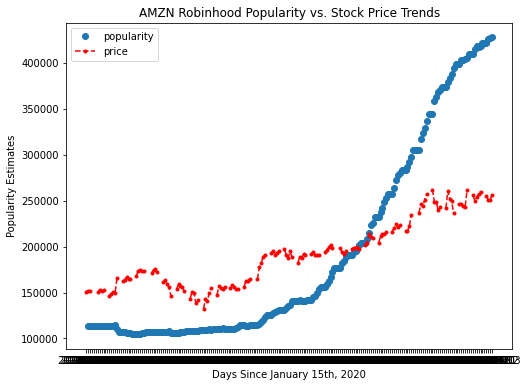

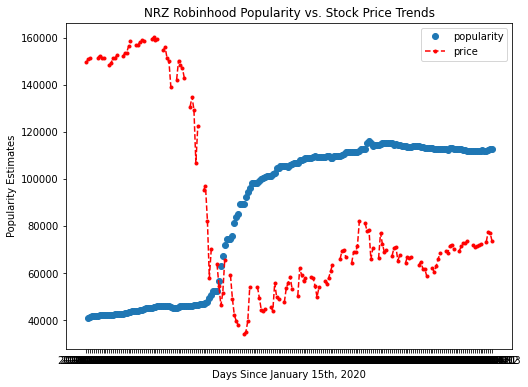

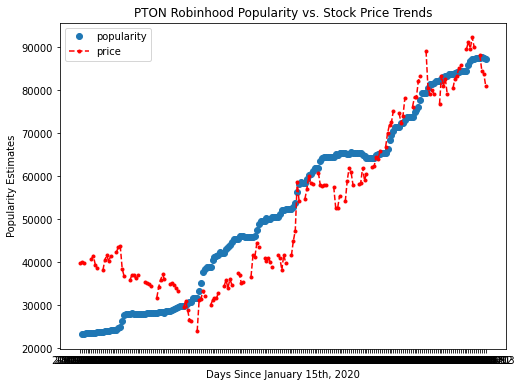

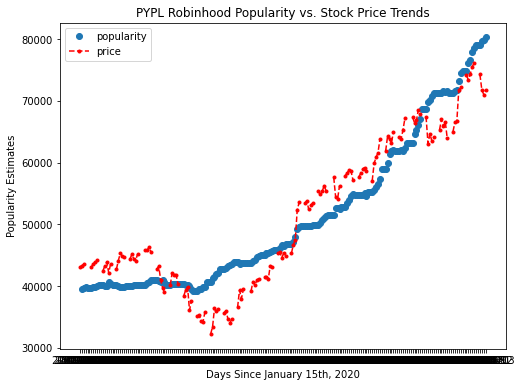

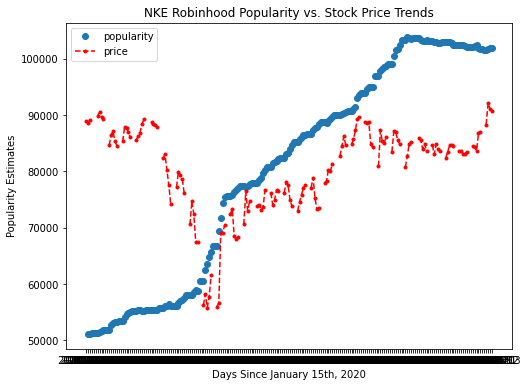

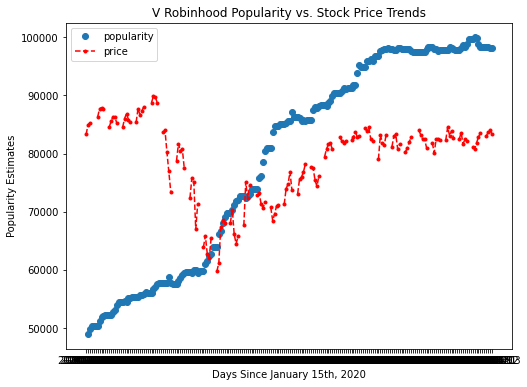

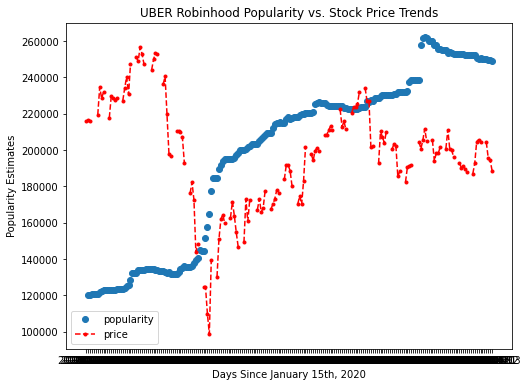

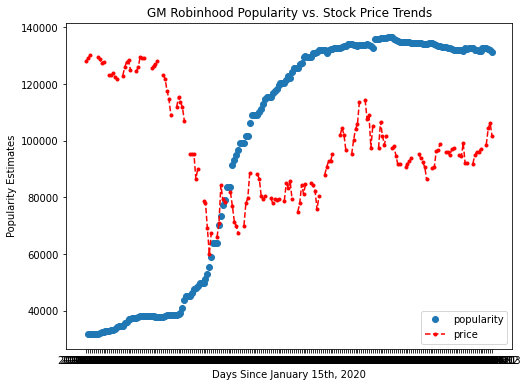

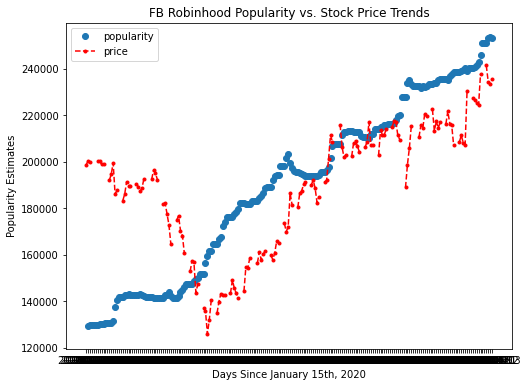

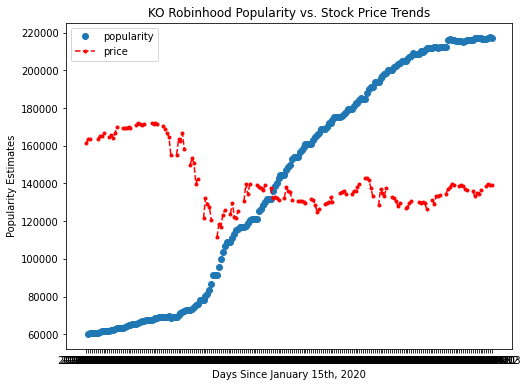

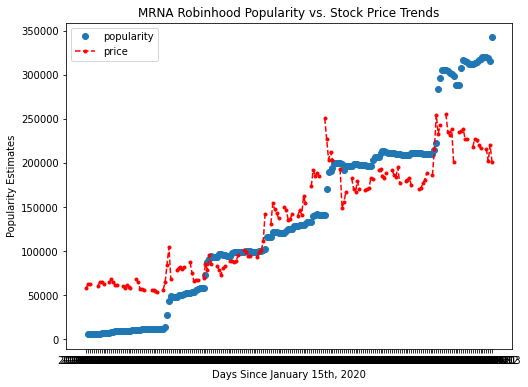

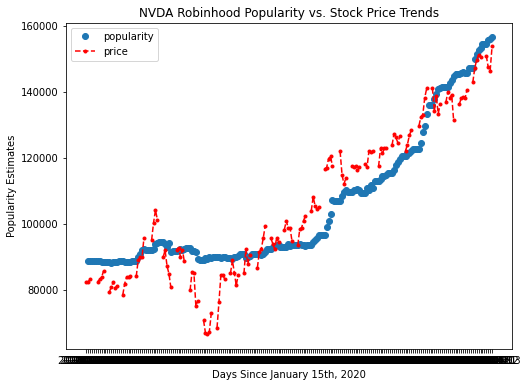

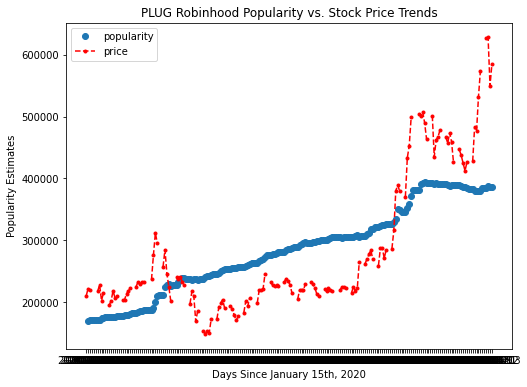

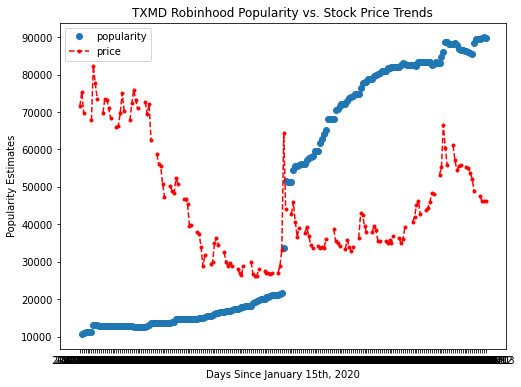

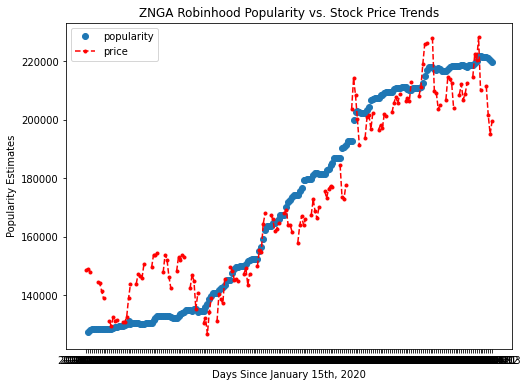

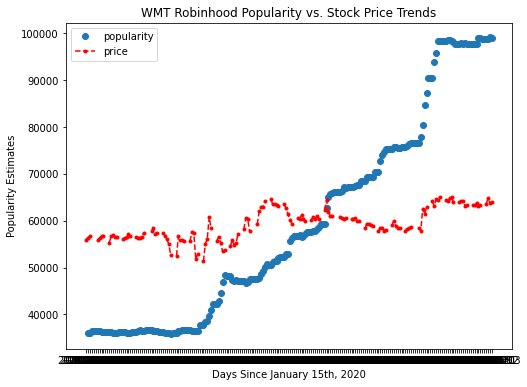

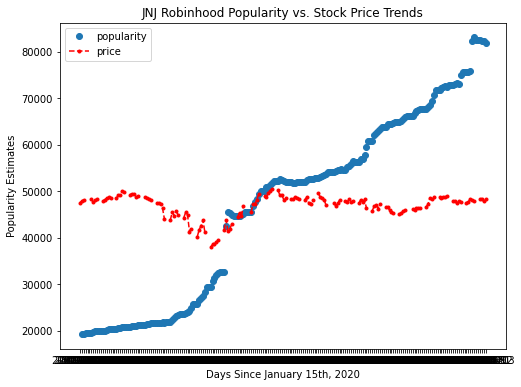

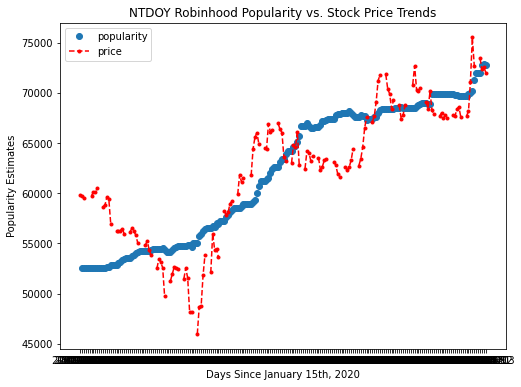

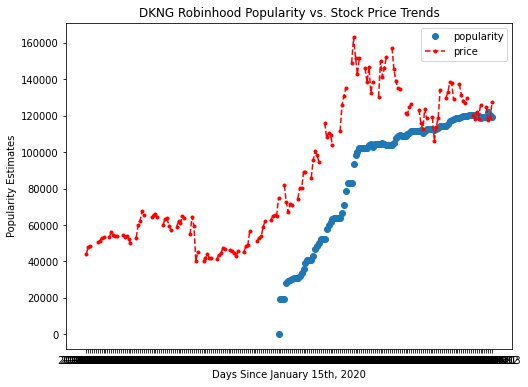

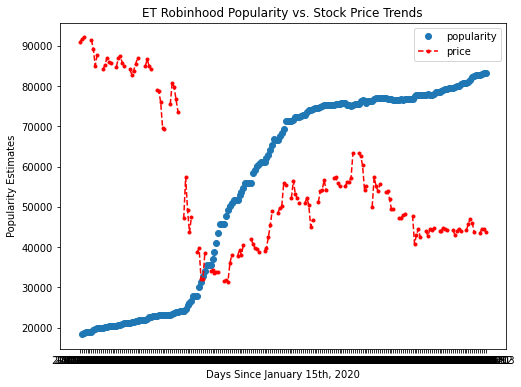

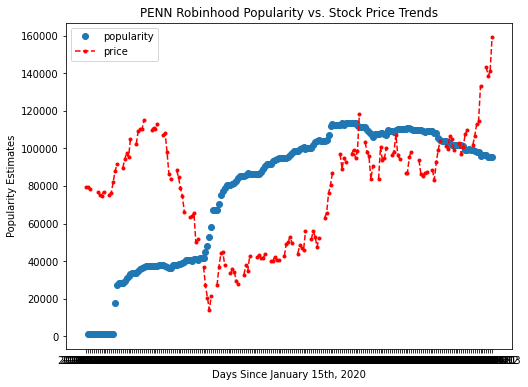

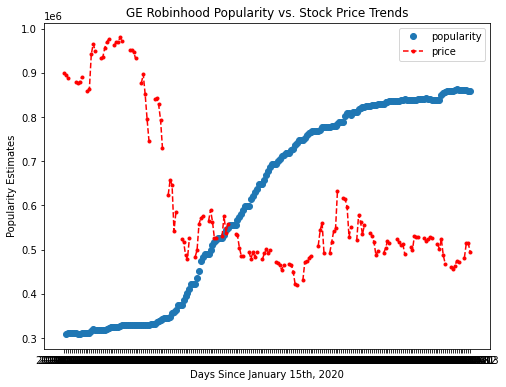

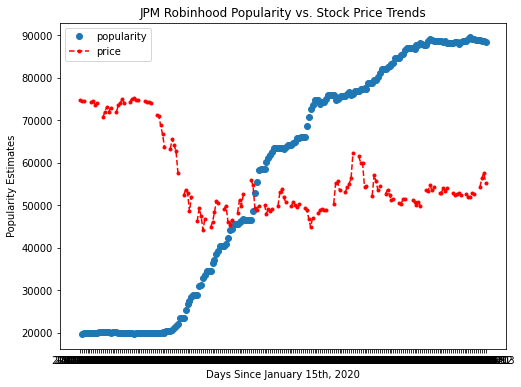

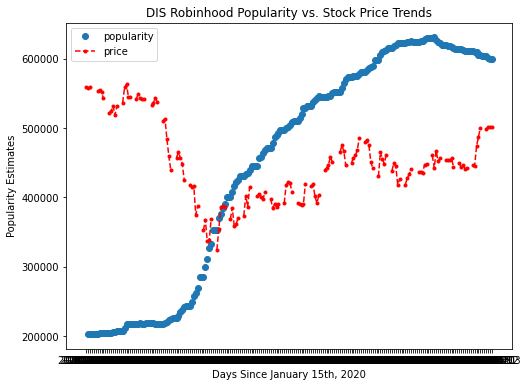

In [49]:
for company in companies:
    popularity = [popularity_data[popularity_data['date'] == date][company] for date in dates]
    popularity = pd.DataFrame(popularity).mean(skipna = True)
    price = [price_data[price_data['date'] == date][company] for date in dates]
    price = pd.DataFrame(price).mean(skipna = True)
    price = (popularity.mean(skipna = True) / price.mean(skipna = True))*price
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(dates, popularity, 'o', label="popularity")
    ax.plot(dates, price, 'r--.', label="price")
    plt.xlabel('Days Since January 15th, 2020')
    plt.ylabel('Popularity Estimates')
    plt.title(company + ' Robinhood Popularity vs. Stock Price Trends')
    plt.legend()
    plt.savefig('./graphs/' + company + '.png')

In [45]:
df = pd.DataFrame(popularity).mean(axis = 1, skipna = True)
df2 = pd.DataFrame(price).mean(axis = 1, skipna = True)

In [46]:
(df.mean(skipna = True)/df2.mean(skipna = True)) * df2

623    559540.262418
624    557159.363605
625    558887.394817
626              NaN
627              NaN
           ...      
830              NaN
831    498252.321120
832    501247.590581
833    501785.201571
834    501670.003331
Length: 212, dtype: float64